# Versuch 2: Radioaktivität

(@everyone: please only write in the respective notebook that you are assigned to, to avoid merge conflicts)
(I will then put everything in a collective notebook for the advisors)

In [62]:
# I would recommend to get yourself the uncertainties package, otherwise you can comment all of this out
# https://pythonhosted.org/uncertainties/
from uncertainties import ufloat
from uncertainties.umath import *  # sin(), etc.
import uncertainties.umath

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2.1. Messung der Geigerzähler-Charakteristik

Zählrate (unkorrigiert von HGS!) gegen Spannung auftragen |
Zählraten-Fehler ergibt sich aus Poisson-Verteilung


jeweils 3x Messungen für 15 Sekunden |
erst ab 750V wurde etwas gemessen (daher die anderen Daten trivial) |
Zählrate wurde bei 1/min belassen

In [3]:
# x data
voltage = np.array([0,100,200,300,400,500,600,700,750,800,850,900,950,1000,1050,1100,1150,1200]) #volt
# y data
# averaging over 3 data points and their errors!
number_decacy_per_minute = np.array([ufloat(0,0),ufloat(0,0),ufloat(0,0),ufloat(0,0),
                                    ufloat(0,0),ufloat(0,0),ufloat(0,0),ufloat(0,0),
                                    np.mean([ufloat(8,np.sqrt(8)),ufloat(760,np.sqrt(760)),ufloat(1608,np.sqrt(1608))]),
                                    np.mean([ufloat(2788,np.sqrt(2788)),ufloat(2960,np.sqrt(2960)),ufloat(2788,np.sqrt(2788))]),
                                    np.mean([ufloat(2656,np.sqrt(2656)),ufloat(2680,np.sqrt(2680)),ufloat(2680,np.sqrt(2680))]),
                                    np.mean([ufloat(2852,np.sqrt(2852)),ufloat(2720,np.sqrt(2720)),ufloat(2868,np.sqrt(2868))]),
                                    np.mean([ufloat(3092,np.sqrt(3092)),ufloat(2984,np.sqrt(2984)),ufloat(3120,np.sqrt(3120))]),
                                    np.mean([ufloat(3116,np.sqrt(3116)),ufloat(3016,np.sqrt(3016)),ufloat(3060,np.sqrt(3060))]),
                                    np.mean([ufloat(3176,np.sqrt(3176)),ufloat(3188,np.sqrt(3188)),ufloat(3136,np.sqrt(3136))]),
                                    np.mean([ufloat(3372,np.sqrt(3372)),ufloat(3224,np.sqrt(3224)),ufloat(3088,np.sqrt(3088))]),
                                    np.mean([ufloat(3332,np.sqrt(3332)),ufloat(3212,np.sqrt(3212)),ufloat(3236,np.sqrt(3236))]),
                                    np.mean([ufloat(3316,np.sqrt(3316)),ufloat(3296,np.sqrt(3296)),ufloat(3428,np.sqrt(3428))]),
                                    ])

In [4]:
# averaging over 3 data points and their errors!
#number_decays_per_minute_mean = np.array([0,0,0,0,0,0,0,0,np.mean([8,760,1608]), 
#                                     np.mean([2788,2960,2788]),np.mean([2656,2680,2904]),
#                                         np.mean([2852,2720,2868]),np.mean([3092,2984,3120]),
#                                         np.mean([3116,3016,3060]),np.mean([3176,3188,3136]),
#                                         np.mean([3372,3224,3088]),np.mean([3332,3212,3236]),
#                                         np.mean([3316,3296,3428])])

In [5]:
number_decacy_per_minute_mean_ufloat = np.zeros(len(number_decacy_per_minute))
number_decacy_per_minute_er_ufloat = np.zeros(len(number_decacy_per_minute))
for i in range(len(number_decacy_per_minute)):
    number_decacy_per_minute_mean_ufloat[i] = number_decacy_per_minute[i].n
for i in range(len(number_decacy_per_minute)):
    number_decacy_per_minute_er_ufloat[i] = number_decacy_per_minute[i].s

In [6]:
data = pd.DataFrame({"Spannung / V": voltage, "Zählrate / min$^{-1}$": number_decacy_per_minute_mean_ufloat, "Zählrate-Fehler / min$^{-1/2}$": number_decacy_per_minute_er_ufloat})
data

,Spannung / V,Zählrate / min$^{-1}$,Zählrate-Fehler / min$^{-1/2}$
0,0,0.000000,0.000000
1,100,0.000000,0.000000
2,200,0.000000,0.000000
3,300,0.000000,0.000000
4,400,0.000000,0.000000
5,500,0.000000,0.000000
6,600,0.000000,0.000000
7,700,0.000000,0.000000
8,750,792.000000,16.248077
9,800,2845.333333,30.796825


In [7]:
sns.color_palette("pastel")

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

In [8]:
print(sns.color_palette("pastel").as_hex())

['#a1c9f4', '#ffb482', '#8de5a1', '#ff9f9b', '#d0bbff', '#debb9b', '#fab0e4', '#cfcfcf', '#fffea3', '#b9f2f0']


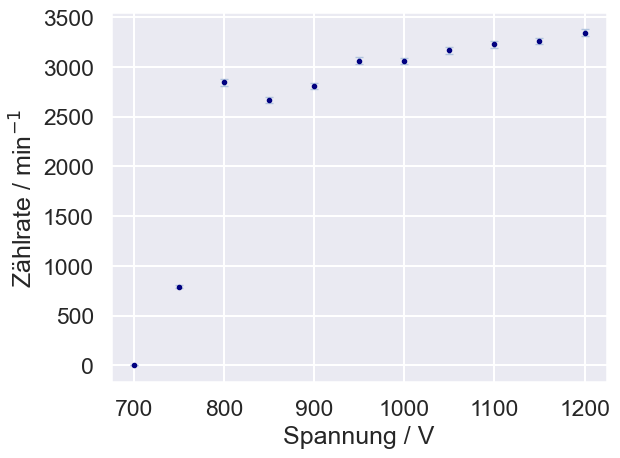

In [9]:
sns.set_theme(style="darkgrid")
sns.set_context("talk")
plt.xlabel("Spannung / V")
plt.ylabel( "Zählrate / min$^{-1}$")
plt.errorbar(x=voltage[7:], 
             y=number_decacy_per_minute_mean_ufloat[7:], 
             yerr=number_decacy_per_minute_er_ufloat[7:],markersize=6,
             fmt=".",color="navy", ecolor="lightsteelblue", elinewidth=2, capsize=3)

#plt.savefig("Geigerzähler_Charakteristik.png", dpi = 500,bbox_inches='tight')
plt.show()

### 2.3. Halbwertszeit von Barium 137

In [47]:
# read in data
# first and last value are not needed
raw_data_3 = pd.read_csv("Gruppe1_SS23/Messung3/Messung3_Barium", skiprows=5,skipfooter=1,delim_whitespace=True, 
                         names=["time / ms", "counting rate / min$^{-1}$"], header=None,encoding='latin-1')

raw_data_3

/var/folders/vd/1vfn276n33s78rfpf3bb9h300000gn/T/ipykernel_36180/2475107882.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  raw_data_3 = pd.read_csv("Gruppe1_SS23/Messung3/Messung3_Barium", skiprows=5,skipfooter=1,delim_whitespace=True,


,time / ms,counting rate / min$^{-1}$
0,15124,816
1,30262,876
2,45385,840
3,60502,696
4,75530,716
5,90647,632
6,105776,580
7,120910,604
8,136037,528
9,151162,548


#### without HGS correction

In [69]:
# manipulating the data
data_without_hgs_correction = pd.DataFrame()
data_without_hgs_correction["time / s"] = raw_data_3["time / ms"]/1000
data_without_hgs_correction["counting rate / s$^{-1}$"] = raw_data_3["counting rate / min$^{-1}$"]/60

# assuming poisson distribution

data_without_hgs_correction["counting rate error / s$^{-1}$"] = np.sqrt(data_without_hgs_correction["counting rate / s$^{-1}$"] * 15)/15
# include actual time steps
for i in range(len(data_without_hgs_correction["counting rate error / s$^{-1}$"])):
    if i == 0:
        time_step = data_without_hgs_correction["time / s"][i]
    else:
        time_step = data_without_hgs_correction["time / s"][i] - data_without_hgs_correction["time / s"][i-1]
    data_without_hgs_correction["counting rate error / s$^{-1}$"][i] = np.sqrt(data_without_hgs_correction["counting rate / s$^{-1}$"][i] * time_step)/time_step

# for analysis we need the logarithm of the counting rate

data_without_hgs_correction["log(counting rate) / s$^{-1}$"] = np.log(data_without_hgs_correction["counting rate / s$^{-1}$"])
#error of logarithmic value is simply given as:
data_without_hgs_correction["log(counting rate error) / s$^{-1}$"] = data_without_hgs_correction["counting rate error / s$^{-1}$"]/data_without_hgs_correction["counting rate / s$^{-1}$"]

In [70]:
data_without_hgs_correction

,time / s,counting rate / s$^{-1}$,counting rate error / s$^{-1}$,log(counting rate) / s$^{-1}$,log(counting rate error) / s$^{-1}$
0,15.124,13.600000,0.948279,2.610070,0.069726
1,30.262,14.600000,0.982069,2.681022,0.067265
2,45.385,14.000000,0.962155,2.639057,0.068725
3,60.502,11.600000,0.875984,2.451005,0.075516
4,75.530,11.933333,0.891108,2.479336,0.074674
5,90.647,10.533333,0.834738,2.354545,0.079247
6,105.776,9.666667,0.799343,2.268684,0.082691
7,120.910,10.066667,0.815579,2.309230,0.081018
8,136.037,8.800000,0.762720,2.174752,0.086673
9,151.162,9.133333,0.777082,2.211931,0.085082


$\ln{\left(A(t) \right)} = \ln{\left(A_0 \right)} - \lambda t$

In [72]:
import scipy.optimize
def fit_function(t,ln_a_0,decay_rate):
    return ln_a_0 - decay_rate*t

In [74]:
p_opt, p_var = scipy.optimize.curve_fit(fit_function, data_without_hgs_correction["time / s"],
                                        data_without_hgs_correction["log(counting rate) / s$^{-1}$"])
print("ln(A_0) =",p_opt[0],"+/-",np.sqrt(p_var[0][0]))
print("lambda =",p_opt[1],"+/-",np.sqrt(p_var[1][1]))
decay_rate_determined = ufloat(p_opt[1], np.sqrt(p_var[1][1]))

ln(A_0) = 2.692051367590735 +/- 0.047270929416509136
lambda = 0.0038191018257371858 +/- 0.00012974942558427265


In [75]:
half_time = np.log(2)/decay_rate_determined
half_time

181.49481532248748+/-6.166069696261858

In [76]:
#in minues
half_time/60

3.0249135887081247+/-0.10276782827103097

this is the error of the fit, but there is also error of the measurements!

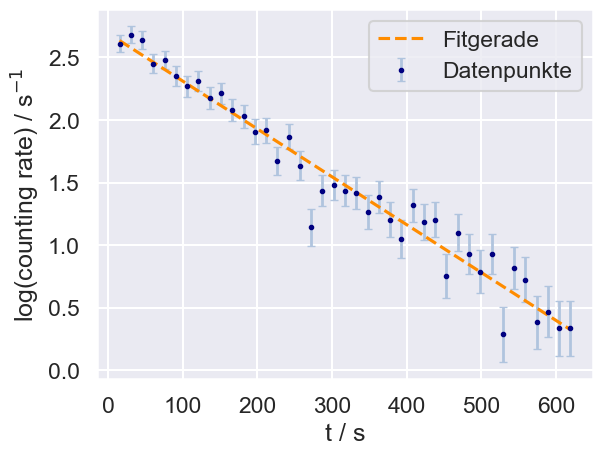

In [77]:
sns.set_theme(style="darkgrid")
sns.set_context("talk")
plt.xlabel("t / s")
plt.ylabel( "log(counting rate) / s$^{-1}$")
plt.errorbar(x=data_without_hgs_correction["time / s"] , 
             y=data_without_hgs_correction["log(counting rate) / s$^{-1}$"] , 
             yerr=data_without_hgs_correction["log(counting rate error) / s$^{-1}$"],markersize=6,
             fmt=".",color="navy", ecolor="lightsteelblue", elinewidth=2, capsize=3, label="Datenpunkte")
plt.plot(data_without_hgs_correction["time / s"], 
         fit_function(data_without_hgs_correction["time / s"],p_opt[0],p_opt[1]), "--", color="darkorange", label="Fitgerade")
plt.legend()
#plt.savefig()
plt.show()

#### with HGS correction